In [1]:
%matplotlib inline

# This will reload all modules before executing a new line
# This is important, if we change our modules, we don't have to restart the kernel
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import loading_data as ld

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## 1. LOADING DATA

Loading CSV Files:

In [3]:
df_train = ld.load_train_values()
df_label = ld.load_train_labels()
df_test = ld.load_test_values()

print(df_train.shape)
print(df_label.shape)
print(df_test.shape)

(260601, 39)
(260601, 2)
(86868, 39)


Merging train values and train labels:

In [5]:
train_data_full = pd.merge(df_train, df_label, on='building_id')

## 2. EXPLANATORY DATA ANALYSIS (EDA)

### 2.1. DATA DESCRIPTION

Min, Max and Mean Values - Detect any possible outlier

In [15]:
train_data_full.describe()
# Outliers in the age column

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Checking how many unique values there are for each variable and Checking if there is any missing value

In [8]:
train_summary = pd.DataFrame({
    "Data type": train_data_full.dtypes,
    "Unique values": train_data_full.nunique(),
    "Missing value": train_data_full.isnull().sum()
})
print(train_summary)

                                       Data type  Unique values  Missing value
building_id                                int64         260601              0
geo_level_1_id                             int64             31              0
geo_level_2_id                             int64           1414              0
geo_level_3_id                             int64          11595              0
count_floors_pre_eq                        int64              9              0
age                                        int64             42              0
area_percentage                            int64             84              0
height_percentage                          int64             27              0
land_surface_condition                    object              3              0
foundation_type                           object              5              0
roof_type                                 object              3              0
ground_floor_type                         object    

We need to do something about location data. There are 3 columns. We will compare values with test data

In [10]:
print(df_train['geo_level_1_id'].nunique())
print(df_test['geo_level_1_id'].nunique())

31
31


In [16]:
print(df_train['geo_level_2_id'].nunique())
print(df_test['geo_level_2_id'].nunique())
# we have "50" location numbers in the train set that are not in the test set

1414
1364


In [17]:
print(df_train['geo_level_3_id'].nunique())
print(df_test['geo_level_3_id'].nunique())
# we have "1380" location numbers in the train set that are not in the test set

11595
10213


### 2.2. DATA VISUALIZATION

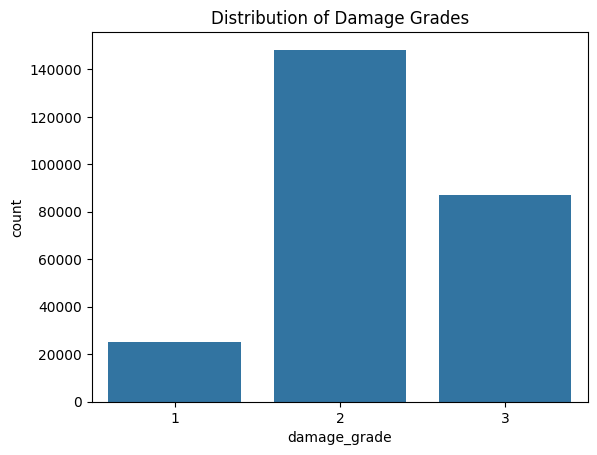

In [19]:
sns.countplot(data=train_data_full, x='damage_grade')
plt.title('Distribution of Damage Grades')
plt.show()
# Something to be done about low amount of damage grade 1

## 3. DATA PREPROCESSING

### 3.1. MEAN ENCODING FOR LOCATION VALUES

In [22]:
import geolocation_encoding as ge

# Assuming you have a DataFrame named df_label that contains 'damage_grade' column
df_geolocation_encoding, mean_damage_map = ge.encode_geolocation(train_data_full, df_label=df_label)

In [24]:
df_geolocation_encoding.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,geo_level_2_id_mean_damage
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2.740741
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2.487437
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,2.518750
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2.107317
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,2.348748


### 3.2. ONE-HOT-ENCODING FOR COLUMNS WITH "OBJECTs"

In [23]:
import feature_engineering as fe
df_train_engineered = fe.engineer_features(df_geolocation_encoding)

Dropping 3 columns from the dataframe.
List of columns to drop:
0:	position
1:	plan_configuration
2:	legal_ownership_status

One-hot encoding 5 columns.
List of columns to one-hot encode:
0:	land_surface_condition
1:	foundation_type
2:	roof_type
3:	ground_floor_type
4:	other_floor_type



### 3.3. DATA CLEANING - DROPPING UNNECESSARY COLUMNS

In [30]:
df_train_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 52 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             260601 non-null  int64  
 1   geo_level_1_id                          260601 non-null  int64  
 2   geo_level_2_id                          260601 non-null  int64  
 3   geo_level_3_id                          260601 non-null  int64  
 4   count_floors_pre_eq                     260601 non-null  int64  
 5   age                                     260601 non-null  int64  
 6   area_percentage                         260601 non-null  int64  
 7   height_percentage                       260601 non-null  int64  
 8   has_superstructure_adobe_mud            260601 non-null  int64  
 9   has_superstructure_mud_mortar_stone     260601 non-null  int64  
 10  has_superstructure_stone_flag           2606

## 4. FEATURE ENGINEERING

## 5. MODEL BUILDING AND EVALUATION

## 6. PREDICTIONS OUTPUT